In [12]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data
%matplotlib inline
import matplotlib.pyplot
from time import time

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.cross_validation import StratifiedShuffleSplit

from sklearn.grid_search import GridSearchCV


In [13]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

# The data_dict is organized as a list of people, each containing a dictionary of features
# Display general information about the dataset...
print "Total Number of data points:", len(data_dict)
print data_dict.keys(), "\n"

poi=0
npoi=0
for person in data_dict:
    if data_dict[person]["poi"] == 0:
        npoi += 1
    else:
        poi += 1
        
print "There are", npoi, "non-POI records and", poi, "POI records.\n"

print "All Features:", data_dict[data_dict.keys()[0]].keys(), "\n"

print "Number of Features:", len(data_dict[data_dict.keys()[0]].keys())

for feature in data_dict[data_dict.keys()[0]].keys():
    nan=0
    for person in data_dict:
        if data_dict[person][feature] == 'NaN':
            nan += 1
            
    print feature, "has", nan, "records with missing values."
    

    

Total Number of data points: 146
['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHAR

Possible Outlier for salary : TOTAL


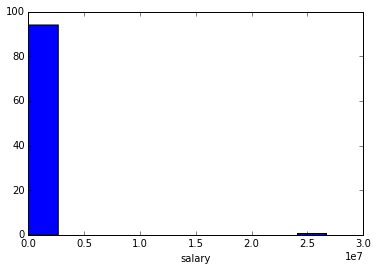

Possible Outlier for to_messages : SHAPIRO RICHARD S


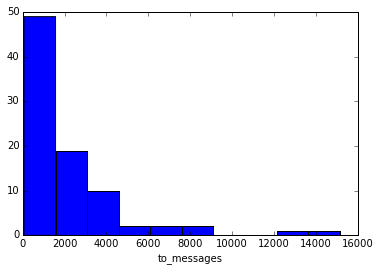

Possible Outlier for deferral_payments : TOTAL


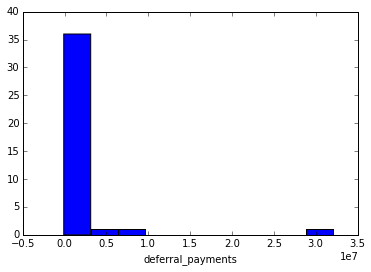

Possible Outlier for total_payments : TOTAL


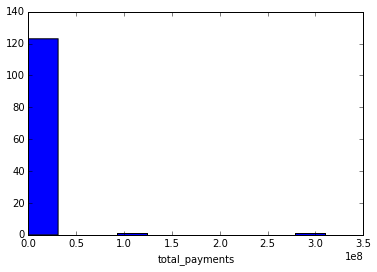

Possible Outlier for exercised_stock_options : TOTAL


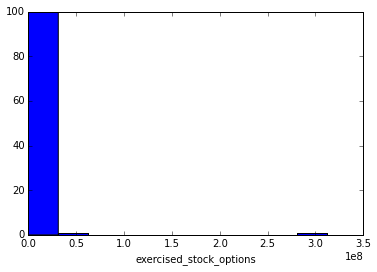

Possible Outlier for bonus : TOTAL


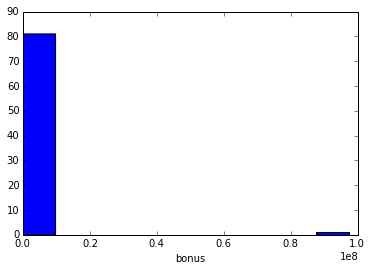

Possible Outlier for restricted_stock : TOTAL


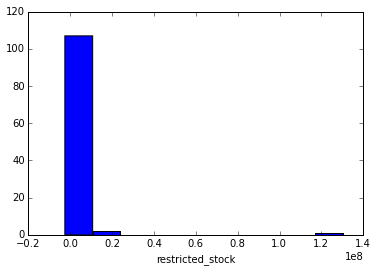

Possible Outlier for shared_receipt_with_poi : BELDEN TIMOTHY N


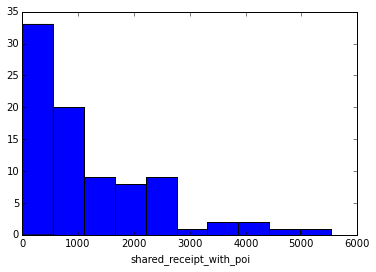

Possible Outlier for restricted_stock_deferred : BHATNAGAR SANJAY


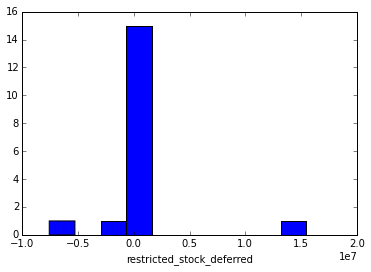

Possible Outlier for total_stock_value : TOTAL


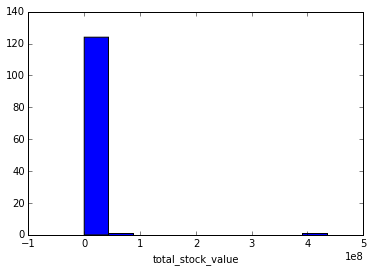

Possible Outlier for expenses : TOTAL


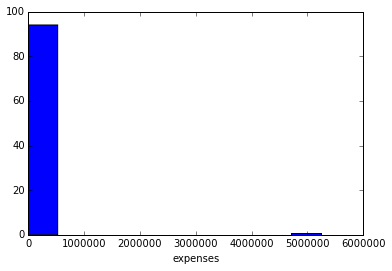

Possible Outlier for loan_advances : TOTAL


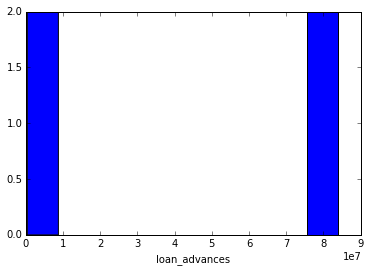

Possible Outlier for from_messages : KAMINSKI WINCENTY J


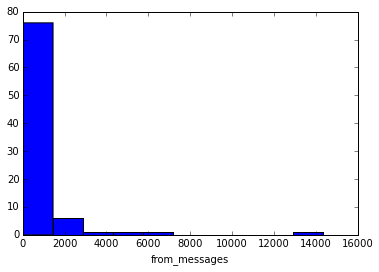

Possible Outlier for other : TOTAL


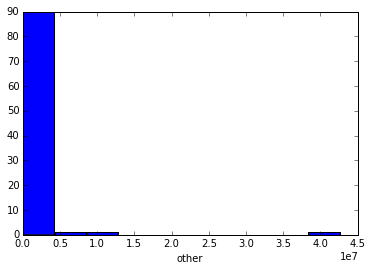

Possible Outlier for from_this_person_to_poi : DELAINEY DAVID W


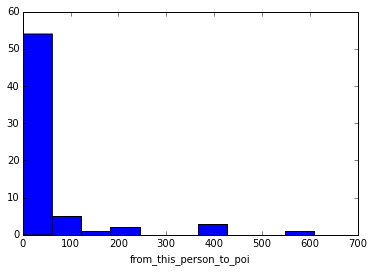

Possible Outlier for director_fees : TOTAL


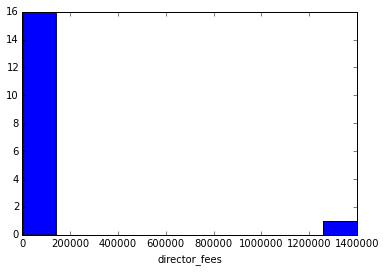

Possible Outlier for deferred_income : BOWEN JR RAYMOND M


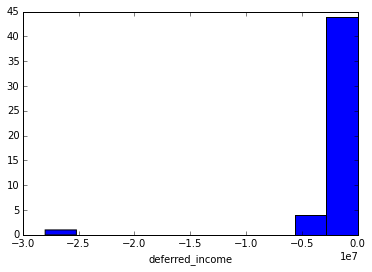

Possible Outlier for long_term_incentive : TOTAL


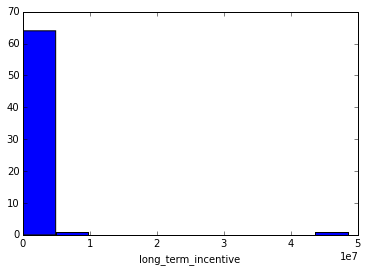

Possible Outlier for from_poi_to_this_person : LAVORATO JOHN J


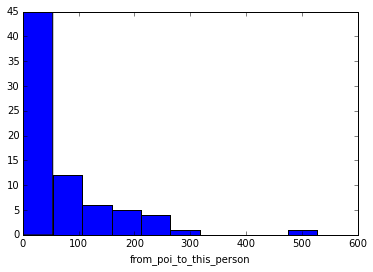

In [14]:
### Task 2: Remove outliers
#
# Identify possible outliers by looking at a histogram for each field.  
# Identify the person with the max value for each field.  

for feature in data_dict[data_dict.keys()[0]].keys():
    if feature == "email_address" or feature == 'poi':
        continue
    data = featureFormat(data_dict, [feature])
    for person in data_dict:
        if data_dict[person][feature] == max(data):
            print "Possible Outlier for", feature, ":", person
    matplotlib.pyplot.hist(data, bins=10)
    matplotlib.pyplot.xlabel(feature)
    matplotlib.pyplot.show()
    

In [15]:
# Locate bad data (if any)
for person in data_dict:
    delete = True
    for feature in data_dict[person]:
        if feature == "email_address" or feature == 'poi':
            continue
        if data_dict[person][feature] == 'NaN':
            continue
        if data_dict[person][feature] > 0:
            delete = False  #If any field is positive, then keep the record...
    if delete:
        print person
        for feature in data_dict[person]:
            print feature, data_dict[person][feature]  # something is wrong with the data.
    

LOCKHART EUGENE E
salary NaN
to_messages NaN
deferral_payments NaN
total_payments NaN
exercised_stock_options NaN
bonus NaN
restricted_stock NaN
shared_receipt_with_poi NaN
restricted_stock_deferred NaN
total_stock_value NaN
expenses NaN
loan_advances NaN
from_messages NaN
other NaN
from_this_person_to_poi NaN
poi False
director_fees NaN
deferred_income NaN
long_term_incentive NaN
email_address NaN
from_poi_to_this_person NaN


Possible Outlier for salary : SKILLING JEFFREY K


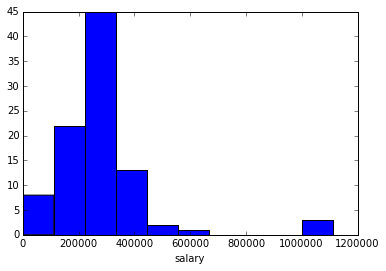

Possible Outlier for to_messages : SHAPIRO RICHARD S


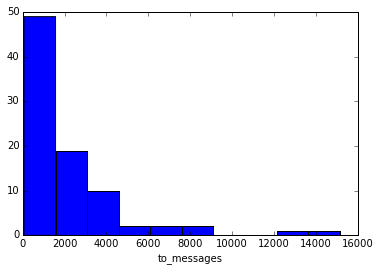

Possible Outlier for deferral_payments : FREVERT MARK A


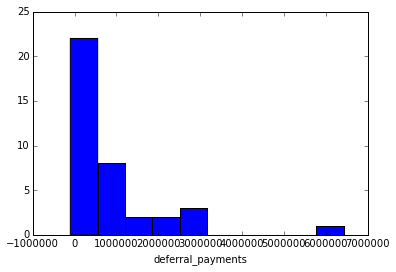

Possible Outlier for total_payments : LAY KENNETH L


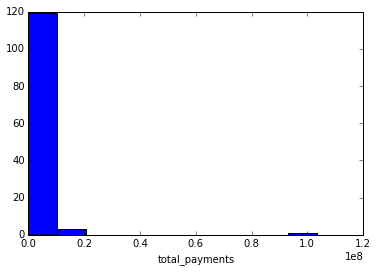

Possible Outlier for exercised_stock_options : LAY KENNETH L


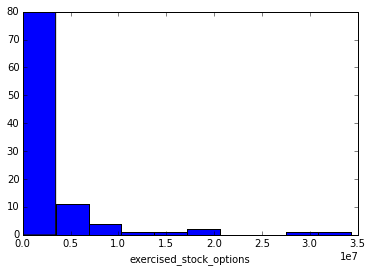

Possible Outlier for bonus : LAVORATO JOHN J


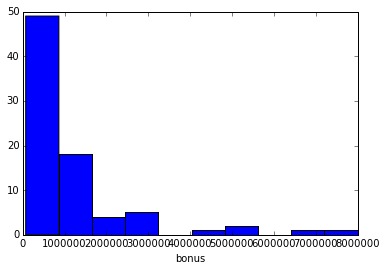

Possible Outlier for restricted_stock : LAY KENNETH L


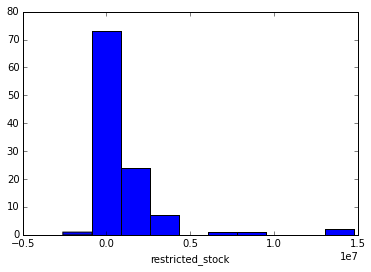

Possible Outlier for shared_receipt_with_poi : BELDEN TIMOTHY N


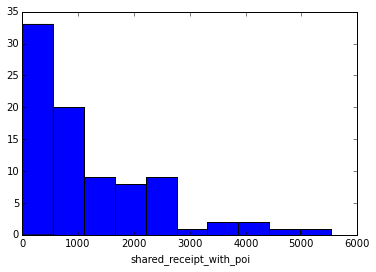

Possible Outlier for restricted_stock_deferred : BHATNAGAR SANJAY


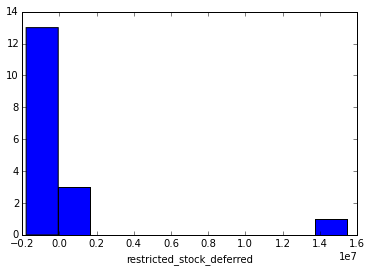

Possible Outlier for total_stock_value : LAY KENNETH L


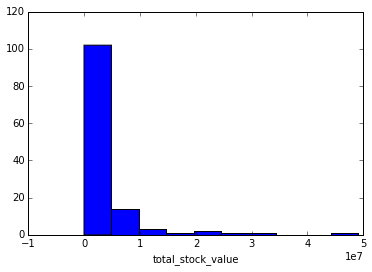

Possible Outlier for expenses : MCCLELLAN GEORGE


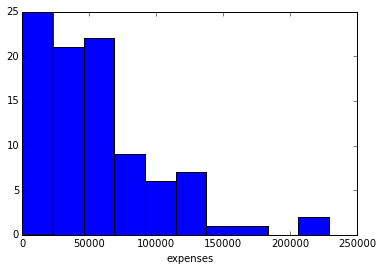

Possible Outlier for loan_advances : LAY KENNETH L


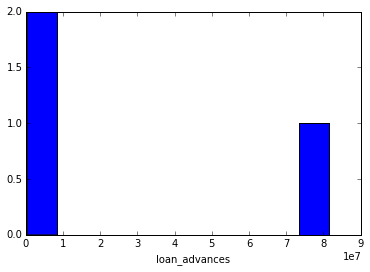

Possible Outlier for from_messages : KAMINSKI WINCENTY J


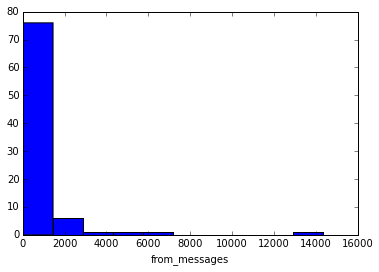

Possible Outlier for other : LAY KENNETH L


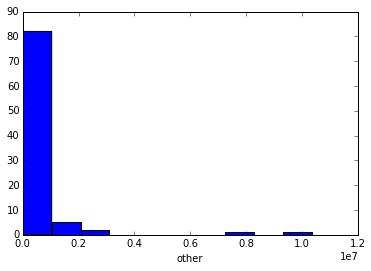

Possible Outlier for from_this_person_to_poi : DELAINEY DAVID W


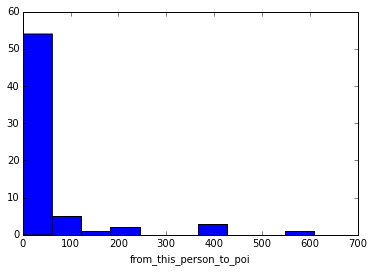

Possible Outlier for director_fees : BHATNAGAR SANJAY


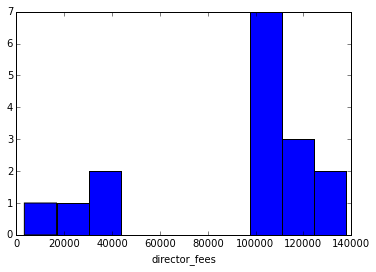

Possible Outlier for deferred_income : BOWEN JR RAYMOND M


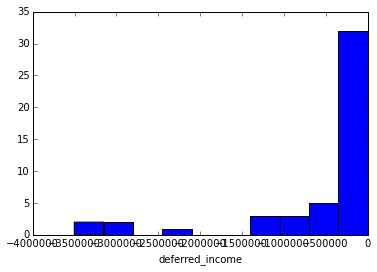

Possible Outlier for long_term_incentive : MARTIN AMANDA K


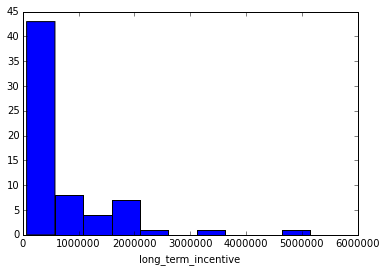

Possible Outlier for from_poi_to_this_person : LAVORATO JOHN J


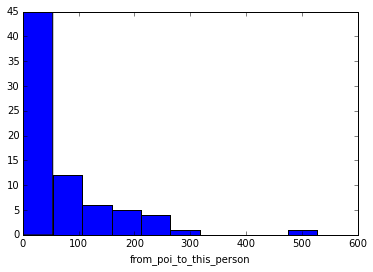

In [16]:
# By looking at the historgrams and and the "person" with the max value, 
# it becomes obvious that "TOTAL" is a sum of the data and not a valid person.
# Remove TOTAL from the data.  Additionally, by since there are only 146 total
# records, a visual inspection of the names reveals not only the "TOTAL" person, 
# but also a person named "THE TRAVEL AGENCY IN THE PARK".  Upon reviewing the 
# accompanying pdf from FindLaw, we learn that "Payments were made by Enron 
# employees on account of business-related travel" to this "person".  Since this
# is not a POI and not a real person, I decided it should also be exluded.
# Additionally, all the values for "LOCKHART EUGENE E" are NaN, so I excluded this
# record as well.
data_dict.pop('TOTAL', 0 )
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0 )
data_dict.pop('LOCKHART EUGENE E', 0 )

# Reproduce the historgrams and look for possibly other outliers...
for feature in data_dict[data_dict.keys()[0]].keys():
    if feature == "email_address" or feature == 'poi':
        continue
    data = featureFormat(data_dict, [feature])
    for person in data_dict:
        if data_dict[person][feature] == max(data):
            print "Possible Outlier for", feature, ":", person
    matplotlib.pyplot.hist(data, bins=10)
    matplotlib.pyplot.xlabel(feature)
    matplotlib.pyplot.show()

###
# After reviewing the new historgrams, while some people appear more than others 
# with large values, these are persons of interest and should remain in the dataset.  
# No further cleaning is required.

In [17]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

# Add ratio of bonus to pay
for person in my_dataset:
    if my_dataset[person]['salary'] > 0 and \
    my_dataset[person]['salary'] != 'NaN' and \
    my_dataset[person]['bonus'] != 'NaN':
        my_dataset[person]['bonusratio'] = 1.0 * \
        my_dataset[person]['bonus'] / my_dataset[person]['salary']
    else:
        my_dataset[person]['bonusratio'] = 'NaN'
        
# Add ratio of poi email messages (higher percentage of email 
# to/from a poi could indicate also a poi)
for person in my_dataset:
    if my_dataset[person]['to_messages'] != 'NaN' and \
    my_dataset[person]['from_messages'] != 'NaN' and \
    my_dataset[person]['from_this_person_to_poi'] != 'NaN' and \
    my_dataset[person]['from_poi_to_this_person'] != 'NaN':
        poi_email = my_dataset[person]['from_this_person_to_poi'] + \
        my_dataset[person]['from_poi_to_this_person']
        all_email = my_dataset[person]['to_messages'] + my_dataset[person]['from_messages']
        my_dataset[person]['poi_email_ratio'] = 1.0 * poi_email / all_email
    else:
        my_dataset[person]['poi_email_ratio'] = 'NaN'
        


In [18]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Below are the classifiers that were tried.  Pipelines were used in order to easily setup
# the flow.  A MinMaxScaler was used in the pipeline because some pipelines included PCA, 
# which  has been results when used on scaled values.
# 1: MinMaxScaler, SelectKBest(score_func=f_classif), PCA, GaussianNB
#   {'kbest__k': [5, 10, 15, 20], 'pca__n_components': [2, 3, 4], 
#       'pca__whiten': [True, False]}
#   fit time: 83.653 s
#   Best Params: {'kbest__k': 10, 'pca__n_components': 4, 'pca__whiten': True}
#   Accuracy: 0.83227, Precision: 0.34877, Recall: 0.29750, F1: 0.32110, F2: 0.30651
#
# 2: SelectKBest(score_func=f_classif), GaussiabNB
#   {'kbest__k': [5, 10, 15, 20]}
#   pipeline 1 fit time: 10.282 s
#   Best Params: {'kbest__k': 5}
#   Accuracy: 0.84653, Precision: 0.41322, Recall: 0.35950, F1: 0.38449, F2: 0.36910
#
# 3: MinMaxScaler, SelectKBest(score_func=f_classif), PCA, LogisticRegression
#   {'kbest__k': [5, 10, 15, 20], 'pca__n_components': [2, 3, 4], 
#      'pca__whiten': [True, False], clf__C': [1, 10, 100, 1000], 
#       'clf__solver': ['liblinear', 'newton-cg']}
#   fit time: 1083.793 s
#   Best Params: {'pca__n_components': 4, 'kbest__k': 10, 'clf__C': 100, 
#      'clf__solver': 'liblinear', 'pca__whiten': True}
#   Accuracy: 0.85933, Precision: 0.42188, Recall: 0.14850, F1: 0.21967, F2: 0.17061
#   
# 4: MinMaxScaler, SelectKBest(score_func=f_classif), PCA,  SVC(random_state =42)
#   {'kbest__k': [5, 10, 15, 20], 'pca__n_components': [2, 3, 4], 
#       'pca__whiten': [True, False], 'clf__C': [1, 10, 100, 1000], 
#       'clf__kernel': ['rbf', 'linear']}
#   fit time: 5934.505 s
#   Best Params: {'kbest__k': 15, 'clf__C': 1000, 'pca__n_components': 4, 
#        'pca__whiten': True, 'clf__kernel': 'rbf'}
#   Accuracy: 0.81840, Precision: 0.31146, Recall: 0.29900, F1: 0.30510, F2: 0.30141
#   
# 5: MinMaxScaler, SelectKBest(score_func=f_classif), PCA, 
#        DecisionTreeClassifier(random_state =42)
#   {'kbest__k': [5, 10, 15, 20], 'pca__n_components': [2, 3, 4], 
#        'pca__whiten': [True, False], 'clf__criterion': ['gini', 'entropy'], 
#        'clf__max_depth': [10, 100, 1000, 10000]}
#   fit time: 711.177 s
#   Best Params: {'pca__n_components': 3, 'clf__criterion': 'entropy', 
#       'clf__max_depth': 100, 'kbest__k': 10, 'pca__whiten': True}
#   Accuracy: 0.79760, Precision: 0.23161, Recall: 0.22350, F1: 0.22748, F2: 0.22508
#   
# 6: MinMaxScaler, SelectKBest(score_func=f_classif), GaussiabNB
#   {'kbest__k': [5, 10, 15, 20]}
#   fit time: 11.212 s
#   Best Params: {'kbest__k': 5}
#   Accuracy: 0.84653, Precision: 0.41322, Recall: 0.35950, F1: 0.38449, F2: 0.36910
#   
# 7: MinMaxScaler, SelectKBest(score_func=f_classif), LogisticRegression
#   {'kbest__k': [5, 10, 15, 20], 'clf__C': [1, 10, 100, 1000], 
#         'clf__solver': ['liblinear', 'newton-cg']}
#   fit time: 213.16 s
#   Best Params: {'kbest__k': 20, 'clf__C': 1000, 'clf__solver': 'liblinear'}
#   Accuracy: 0.81933, Precision: 0.21371, Recall: 0.13250, F1: 0.16358, F2: 0.14340
#   
# 8: MinMaxScaler, SelectKBest(score_func=f_classif), 
#         DecisionTreeClassifier(random_state =42)
#   {'kbest__k': [5, 10, 15, 20], 'clf__criterion': ['gini', 'entropy'], 
#         'clf__max_depth': [10, 100, 1000, 10000]}
#   fit time: 104.541 s
#   Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 100, 'kbest__k': 15}
#   Accuracy: 0.80153, Precision: 0.23494, Recall: 0.21650, F1: 0.22534, F2: 0.21995
#   
# 9: MinMaxScaler, SelectKBest(score_func=f_classif), LogisticRegression
#   {'kbest__k': [5, 10, 15, 20], 'clf__C': [1000, 10000, 100000, 1000000], 
#         'clf__solver': ['liblinear', 'newton-cg']}
#   fit time: 403.069 s
#   Best Params: {'kbest__k': 20, 'clf__C': 1000000, 'clf__solver': 'newton-cg'}
#   Accuracy: 0.81647, Precision: 0.26336, Recall: 0.20950, F1: 0.23336, F2: 0.21843
#   
# 10: MinMaxScaler, SelectKBest(score_func=f_classif), PCA,  SVC(random_state =42)
#   {'kbest__k': [5, 10, 15, 20], 'clf__C': [1000, 10000, 100000, 1000000], 
#       'clf__kernel': ['rbf', 'linear']}
#   fit time: 42313.693 s
#   Best Params: {'kbest__k': 20, 'clf__C': 100000, 'clf__kernel': 'rbf'}
#   Accuracy: 0.81113, Precision: 0.29018, Recall: 0.28800, F1: 0.28908, F2: 0.28843
#   
# 11: MinMaxScaler, SelectKBest(score_func=f_classif), PCA, 
#        RandomForestClassifier(random_state =42)
#   {'kbest__k': [5, 10, 15, 20], 'clf__criterion': ['gini', 'entropy'], 
#        'clf__n_estimators': [10, 100, 1000, 10000]}
#   fit time: 66037.228 s
#   Best Params: {'clf__criterion': 'gini', 'kbest__k': 5, 'clf__n_estimators': 100}
#   Accuracy: 0.85973, Precision: 0.44503, Recall: 0.21050, F1: 0.28581, F2: 0.23530

# The best classifier turned out the be the GaussianNB when run with 
# SelectKBest(k=5, score_func=f_classif).  The pipeline fit was about 10 seconds.  Adding in 
# scaling made no change to the accuracy or presicion, which was expected.

# Setup the pipeline
# GaussianNB gave the best results with no scaler and no PCA.  This is the classifer that 
# will be used to generate the project pickle files.  All the above tests were performed in 
# the same manner by modifying the pipeline.
pipeline = Pipeline(steps=[('kbest', SelectKBest(score_func=f_classif)),
                            ('clf', GaussianNB())
                            ])
p_params = {'kbest__k': [5, 10, 15, 20]}



In [19]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
# Create a feature_list that has all features on it.  We will use selectKBest to determine the best features to keep.
all_features = data_dict[my_dataset.keys()[0]].keys()
all_features.remove('poi')
all_features.remove('email_address')
features_list = ['poi']
features_list.extend(all_features)

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Create 1000 random test sets to go over...
shuffle = StratifiedShuffleSplit(labels, n_iter=1000, test_size=0.3, random_state=42)

#Select a scoring function.  Turns out recall is not so good...
#scorer = 'recall'
scorer = 'f1'


In [20]:
# Find the best classifer
t0 = time()
p_grid = GridSearchCV(pipeline, param_grid=p_params, cv=shuffle,
                           scoring=scorer, verbose=0)
p_grid.fit(features, labels)
print "fit time:", round(time()-t0, 3), "s"


fit time: 9.98 s


In [21]:
# Results....
features_selected = p_grid.best_estimator_.named_steps['kbest'].get_support()
x=0
print "Feature(Score) Selected:"
for feat in features_list:
    if feat == "poi":
        continue
    if features_selected[x] == True:
        print '   %s(%f)' % (feat, p_grid.best_estimator_.named_steps['kbest'].scores_[x])
    x += 1
print "Score:", p_grid.best_score_
print "Params:", p_grid.best_params_ 

clf = p_grid.best_estimator_
test_classifier(clf, my_dataset, features_list)



Feature(Score) Selected:
   deferred_income(11.458477)
   bonus(20.792252)
   total_stock_value(24.182899)
   salary(18.289684)
   exercised_stock_options(24.815080)
Score: 0.309143105476
Params: {'kbest__k': 5}
Pipeline(steps=[('kbest', SelectKBest(k=5, score_func=<function f_classif at 0x000000001AD2F668>)), ('clf', GaussianNB())])
	Accuracy: 0.84653	Precision: 0.41322	Recall: 0.35950	F1: 0.38449	F2: 0.36910
	Total predictions: 15000	True positives:  719	False positives: 1021	False negatives: 1281	True negatives: 11979



In [22]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)